In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
filename="C:\\Users\\birad\OneDrive\\Documents\\Heart_attack_Dataset_Kaggle_Notepad.csv"
df = pd.read_csv(filename)

In [34]:
def Outliner_info(quart_v):
    print("----------------for",quart_v,"-------------------")
    Q1,Q2,Q3 = df[quart_v].quantile([0.25,0.50,0.75]) 
    quartiles = [Q1,Q2,Q3]
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    print(["Q1","Q2  ","Q3 ","IQR","lower_b  ","upper_b"])
    print([Q1,Q2,Q3,IQR,lower_b,upper_b])
    #value lesser than lower_b and values greater than upper_b are considered as outliners
    lower_index = np.where(df[quart_v] <= lower_b)
    upper_index = np.where(df[quart_v] >= upper_b)
    print("index for lower outliners: ", lower_index)
    print("index for upper outliners: ",upper_index) 
    mean = df[quart_v].mean()
    print("mean of ",quart_v,"=",mean)
    val_list = []
    for val in df[quart_v]:
        if val >= upper_b:
            val_list.append(val)
    print("val_list = ",val_list)   

In [35]:
df1 = df.drop([85], axis = 0, inplace = False) 
df1.at[28,"chol"]= 369 
df1.at[96,"chol"]= 369 
df1.at[220,"chol"]= 369 
df1.at[246,"chol"]= 369

In [36]:
df1.drop([248,223], axis = 0, inplace = True)

In [37]:
temp_list = [  8, 101, 110, 152, 195, 203, 228, 241, 260, 266, 292]
for i in temp_list:
    df1.at[i,"trtbps"]=170

In [38]:
df1.at[272,"thalachh"] = 84

In [39]:
temp_list1 = [101, 204, 220, 221, 250, 291, 295]
for j in temp_list1:
    df1.at[j,"oldpeak"]= 4.0

In [40]:
temp_list2 = [ 92, 158, 163, 164, 251]
for k in temp_list2:
    df1.at[k,"caa"]= 3

In [41]:
df1.at[48,"thall"]=1
df1.at[281,"thall"]=1

In [42]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,3,2,1


In [43]:
df1.duplicated().sum()
df1 = df1.drop_duplicates()

KNN 

Feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

Initial Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()


knn_clf.fit(X_train, y_train)


y_pred_1 = knn_clf.predict(X_test)




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))




from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)

Accuracy: 0.8333333333333334
Precision: 0.8
Recall: 0.9032258064516129
F1 Score: 0.8484848484848486
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        29
           1       0.80      0.90      0.85        31

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



C:\Users\birad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Initial confusion matrix

[[22  7]
 [ 3 28]]


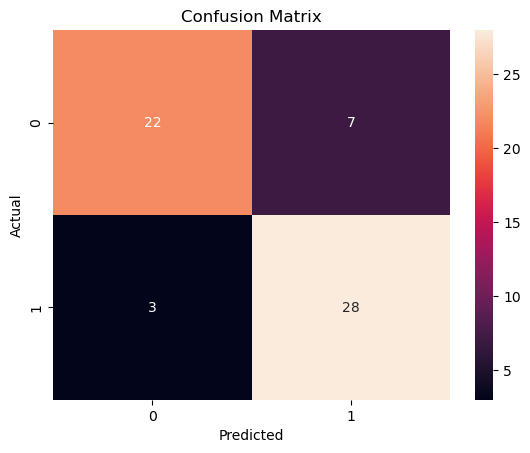

In [46]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)


import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") 

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

GridSearch_CV

In [47]:

from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_neighbors': np.arange(1, 100), 
                'weights' : ['uniform', 'distance'],
                'p': [1,2],
                'algorithm': ['ball_tree', 'kd_tree', 'brute'], 
                'leaf_size': [2,3,4,5,10,15,16,18,20, 30],
            }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

knn_tuned = grid.fit(X_train, y_train)


print("\nTuned KNN Parameters: {}".format(grid.best_params_))
print("Best score is {}".format(grid.best_score_))
print("best estimator: ", knn_tuned.best_estimator_)

Fitting 10 folds for each of 11880 candidates, totalling 118800 fits

Tuned KNN Parameters: {'algorithm': 'ball_tree', 'leaf_size': 2, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
Best score is 0.8538043478260869
best estimator:  KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=20, p=1)


 fINAL MODEL

In [48]:

from sklearn.neighbors import KNeighborsClassifier
knn_tuned = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, n_neighbors=32, p=1, weights='uniform')

knn_tuned.fit(X_train, y_train)

y_pred = knn_tuned.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy: 0.8333333333333334
Precision: 0.7837837837837838
Recall: 0.9354838709677419
F1 Score: 0.8529411764705881
              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.78      0.94      0.85        31

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



C:\Users\birad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


FINAL COPNFUSION MATRIX

[[21  8]
 [ 2 29]]


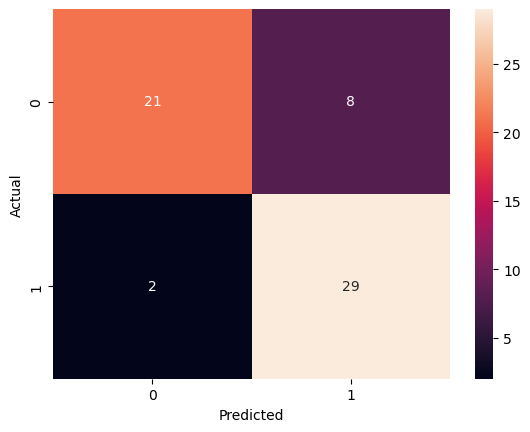

In [49]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cROSS VALIDATION SCORES 

In [50]:

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="accuracy") #scorinf can be accuracy, precision, recall, f1, roc_auc, etc

for i in range(10):
    print("Fold", i, ":", scores[i])

print("\nMean:", scores.mean())

print("Standard Deviation:", scores.std()) 


print("Variance:", scores.var()) 

Fold 0 : 0.8333333333333334
Fold 1 : 0.9583333333333334
Fold 2 : 0.875
Fold 3 : 0.7916666666666666
Fold 4 : 0.8333333333333334
Fold 5 : 0.875
Fold 6 : 0.75
Fold 7 : 0.75
Fold 8 : 0.875
Fold 9 : 0.8260869565217391

Mean: 0.8367753623188404
Standard Deviation: 0.060326086956521745
Variance: 0.003639236767485823


C:\Users\birad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\birad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

lEARNING CURVE

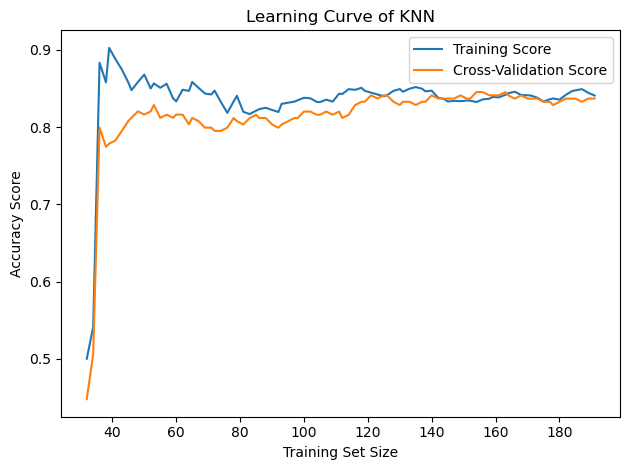

In [51]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(knn_tuned, X_train, y_train, cv=5, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,100))


import matplotlib.pyplot as plt
import numpy as np
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of KNN")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()

